<div class="alert alert-block alert-warning">
    
# Assignment

Welcome to the task 5 of the assignment! This notebook contains all the code and comments that you need to submit. The places where you need to edit are highlighted in red. Feel free to add in your own markdown for additional comments.

__Submission details: make sure you all your outputs have been generated. Submit this Jupyter Notebook__

<b>Enter you student details below</b>

- <b>Student Name:</b> Campbell Gregor
- <b>Student ID:</b> 33110018  

<div class="alert alert-block alert-info">

# Speech Recognition Task

Speech recognition is the task of converting spoken language into written text. It involves processing audio signals and applying machine learning algorithms to recognize and transcribe spoken words or phrases.

- Speech recognition has a wide range of applications, including Voice-Controlled Systems; Speech recognition is used in voice-controlled systems for controlling smart home devices, navigation systems, and automotive applications.

- To perform speech recognition, various techniques and models are used, including Hidden Markov Models (HMMs), Deep Neural Networks (DNNs), and Transformer-based models like Wave2Vec2. These models are trained on large datasets of labeled speech data to learn the patterns and features of spoken language.

- In this task, we are exploring the task of speech recognition using the Wave2Vec2 model. We preprocess audio data, extract features using the pretrained Wave2Vec2 model, and train a simple MLP model to predict the labels. The dataset used in this notebook is the Speech Commands dataset, which consists of audio recordings of various command words.


<div class="alert alert-block alert-info">

## Kaggle Competition: ECSE 4179/5179/6179 - Assignment 1

Welcome to the Kaggle competition for ECSE 4179/5179/6179 - Assignment 1! This competition is part of the course assignments and is designed to test your skills in speech recognition using the Wave2Vec2 model.

### Competition Details

- Competition Link: [ECSE 4179/5179/6179 - Assignment 1](https://www.kaggle.com/competitions/ecse-4179-5179-6179-2024-s-2-assignment-1)
- Registration: You will have been registered with your student email addresses. Please check the above link to see if you can access the assignment.
- Access to Competition Dataset: The competition dataset is available in the Data tab of the Kaggle competition page.
- Competition Rules: The competition rules can be found in the Rules tab of the Kaggle competition page.
- Competition Description: The competition description and task details can be found in the Description tab of the Kaggle competition page.

### Competition Task

The task of this competition is speech recognition, which involves converting spoken language into written text. Participants are required to process audio signals and apply machine learning algorithms to recognize and transcribe spoken words or phrases.

### Dataset

The competition dataset consists of audio recordings of various command words. The dataset is divided into three folders: Train, Validation, and Test. The Train folder contains audio files for training the models, the Validation folder contains audio files for hyperparameter tuning, and the Test folder contains audio files for final predictions.

### Evaluation

The evaluation metric for this competition is accuracy, which measures the percentage of correctly predicted labels.

### Getting Started

To get started with the competition, please follow these steps:

1. Access the competition dataset from the Data tab.
2. Read the competition rules and guidelines from the Rules tab.
3. Understand the competition task and description from the Description tab.
4. Download the dataset and explore the audio files.
5. Preprocess the audio data, extract features using the Wave2Vec2 model, and train your models.
6. Tune the hyperparameters using the validation dataset.
7. Make predictions on the test dataset and submit your results.
8. Monitor your leaderboard position and improve your models if necessary.
9. Submit your final predictions before the assignment deadline.

Good luck and have fun participating in the Kaggle competition!

<div class="alert alert-block alert-warning">

# Libraries

Libraries are important as it saves us time from writing our own functions all the time such as graphing, or creating matrices. Brief library descriptions have been added for every library that we import. You may also check the official documentations for more details.

The required libraries are specified in this notebook for you.

In [1]:
#import all Python packages needed here
import os
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch or Pytorch Lightning(depend on your choice)
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from pytorch_lightning.callbacks import Callback, ModelCheckpoint, EarlyStopping
import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
# TorchMetrics
from torchmetrics.classification import Accuracy

# Hugging Face
from datasets import load_dataset
from transformers import HubertModel, HubertConfig #depend on your choice

# Audio
import soundfile as sf
import librosa

RND_SEED = 42
np.random.seed(RND_SEED)
torch.manual_seed(RND_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# torch.set_default_device(device)

# Import more libraries if needed

cpu


<div class="alert alert-block alert-info">

### Dataset
To work with the audio data in this project, you will need to download the zip file **speech_wav.zip** from the Data tab in the Kaggle Competeition Page. Once you have downloaded the zip file, extract its contents, and move **speech_wav** folder to the same directory as your Python notebook. In **speech_wav** folder you have three folders: Train, Validation, and Test.

- The **Train** folder contains 18,538 audio files, named trn_00000.wav to trn_18537.wav. You will use these audio files to train your model.

- The **Validation** folder contains 2,577 audio files, named val_00000.wav to val_02576.wav. You will use these audio files to find the best hyperparameters for your model.

- The **Test** folder contains 2,567 audio files, named tst_00000.wav to tst_02566.wav. You will save your model's predictions using these audio files for the final submission.

In addition to the audio files, you will also need the corresponding labels for the training and validation phases. The labels are provided in two CSV files: train.csv and validation.csv.

- The **train.csv** file lists the file names under the **ID** column and their corresponding labels under the **Label** column. For example, an entry in the validation.csv file would look like this:

    ID, Label
    
    val_00001.wav, 3

    This indicates that the file val_00001.wav is labeled as category "3," which corresponds to the command "Down."

The ten command labels are mapped as follows:

- 0: Yes
- 1: No
- 2: Up
- 3: Down
- 4: Left
- 5: Right
- 6: On
- 7: Off
- 8: Stop
- 9: Go

To get started, please download the datasets from the Data tab on the Kaggle page.

In [2]:

# Define the mapping of prefixes to the ten command labels
label_mapping = {
    "0_": "Yes", "1_": "No", "2_": "Up", "3_": "Down", "4_": "Left",
    "5_": "Right", "6_": "On", "7_": "Off", "8_": "Stop", "9_": "Go"
}

# Define the path to speech_wav folder
dataset_path = ".\Data\Task5_data\sp_wav"
csv_path = ".\Data\Task5_data"


###

Before you begin to play with the data, you will need to pre-process the audio data. Preprocessing audio data is an essential step in speech recognition tasks. It involves extracting meaningful features from the raw audio signals that can be used as input to machine learning models. There are various models available for audio feature extraction, such as Waveform-based models like Wave2Vec2.

You can choose a model that best suits their needs and expertise to preprocess the audio files. For example, you can use the pretrained Wave2Vec2 model provided by Hugging Face to extract feature embeddings from the audio files. This model has been trained on a large amount of labeled speech data and can capture the patterns and features of spoken language effectively.

To preprocess the audio files using the Wave2Vec2 model, follow these steps:

1. Load the audio files using a suitable audio processing library like librosa.
2. Pass the audio signals through the pretrained Wave2Vec2 model to obtain the feature embeddings.

It is important to note that the choice of the preprocessing model may depend on factors such as the size and complexity of the dataset, the computational resources available, and the specific requirements of the task. By preprocessing the audio files into feature embeddings, you can effectively represent the audio data in a format that can be easily understood and processed by the MLP model. This allows the model to learn and make accurate predictions based on the extracted features.

Some options for the pre-processing are:
- Word2Vec2
- Whisper
- HuBERT


In [3]:
# Initialize HuBERT model
model_name = "facebook/hubert-base-ls960"
hubert_config = HubertConfig.from_pretrained(model_name)
hubert_model = HubertModel.from_pretrained(model_name, config=hubert_config)

# Move the model to the device (GPU if available, otherwise CPU)
hubert_model.to(device)


c:\Users\cgreg\anaconda3\envs\ECE4179\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\cgreg\anaconda3\envs\ECE4179\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted

HubertModel(
  (feature_extractor): HubertFeatureEncoder(
    (conv_layers): ModuleList(
      (0): HubertGroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x HubertNoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x HubertNoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): HubertFeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): HubertEncoder(
    (pos_conv_embed): HubertPositionalConvEmbedding(
      (conv): Para

<div class="alert alert-block alert-info">

### Feature extraction from audio files
The `process_split` function is responsible for processing the audio files and their corresponding labels for a given split (train, validation, or test) of the dataset. It takes two inputs: the path to the CSV file containing the file names and labels, and the path to the folder containing the audio files. The function returns two outputs: the processed feature vectors (pooled tensors) and their corresponding labels.

Here is a high-level explanation of how to write the `process_split` function:

1. Read the CSV file using a suitable library (e.g., pandas) to obtain the file names and labels.
2. Initialize empty lists to store the processed feature vectors and labels.
3. Iterate over each row in the CSV file.
4. Construct the full path to the audio file by concatenating the audio folder path and the file name.
5. Load the audio file using an audio processing library (e.g., librosa).
6. Process the audio input using the desired audio processing model (e.g., Wave2Vec2) to obtain the feature embeddings.
7. Store the processed feature vector (pooled tensor) and its corresponding label in the respective lists.
8. Convert the lists to numpy arrays.
9. Return the processed feature vectors and labels as the output of the function. Use the output of the function to save it to a .npz file format.

By following these steps, the `process_split` function will preprocess the audio files and extract meaningful features that can be used as input to machine learning models for speech recognition tasks.

In [3]:

# Function to process files based on the CSV file and return pooled tensors and labels
def process_split(csv_file, audio_folder):
    pooled_tensors = []
    labels = []
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Process each row in the CSV file
    for _, row in df.iterrows():
        file_name = row['ID']
        label = row['Label']
        
        # Construct the full path to the audio file
        audio_file = f"{file_name}.wav" if not file_name.endswith(".wav") else file_name
        audio_path = os.path.normpath(os.path.join(audio_folder, audio_file))
        
        # Load the audio file using librosa.load
        try:
            # Optionally specify a target sampling rate (e.g., sr=16000)
            audio, sr = librosa.load(audio_path)
        except FileNotFoundError:
            print(f"File not found: {audio_path}")
            continue
        except Exception as e:
            print(f"Error loading {audio_path}: {e}")
            continue
        
        # Process the audio input using the pre-trained HuBERT model
        audio_tensor = torch.tensor(audio).unsqueeze(0).to(device)
        
        # Ensure no gradients are calculated during inference
        with torch.no_grad():
            outputs = hubert_model(audio_tensor)
            features = outputs.last_hidden_state
        
        # Apply average pooling across the sequence dimension to get a 1x768 tensor
        pooled_tensor = torch.mean(features, dim=1).squeeze(0)
        
        # Store the pooled tensor and label
        pooled_tensors.append(pooled_tensor.cpu().numpy())
        labels.append(label)
    
    # Convert lists to numpy arrays
    pooled_tensors = np.array(pooled_tensors)
    labels = np.array(labels)
    
    # Return the pooled tensors and labels
    return pooled_tensors, labels



To obtain the extracted features and corresponding labels for the train, validation, and test splits, you can apply the `process_split` function on each split individually. Here are the steps to follow:

1. Call the `process_split` function for the train split by providing the path to the train CSV file and the audio folder. This will return the processed feature vectors and labels for the train split.

2. Repeat the same step for the validation split and test split, providing the respective CSV file and audio folder paths. However, note that for the test split, you won't have the labels available.


Please note that in the test split, you won't have the labels available as they are not provided.

In [5]:

# Process each split and save the results
for split in ['train', 'validation', 'new_test']:
    csv_file = os.path.join(csv_path,f"{split}.csv")
    audio_folder = os.path.join(dataset_path, split) 
    # Process the split folder
    X, y = process_split(csv_file, audio_folder)
    
    # Save the pooled tensors and labels into an npz file
    npz_file_path = os.path.join(f"{split}_data.npz")
    np.savez(npz_file_path, X=X, y=y)
    
    print(f"Saved {split} data to {npz_file_path}. Shape: {X.shape}, Labels: {y.shape}")

Saved train data to train_data.npz. Shape: (18538, 768), Labels: (18538,)
Saved validation data to validation_data.npz. Shape: (2577, 768), Labels: (2577,)
Saved new_test data to new_test_data.npz. Shape: (2137, 768), Labels: (2137,)


Your output should look similar to the one below: 

```
Saved train data to train_data.npz. Shape: (18538, 768), Labels: (18538,)
Saved validation data to validation_data.npz. Shape: (2577, 768), Labels: (2577,)
Saved test data to test_data.npz. Shape: (2567, 768), Labels: (2567,)
```

<div class="alert alert-block alert-info">

### Dataset Class

To create the train-validation and test sets, we can define a custom Dataset class (SpeechCommandsDataset) that takes the split name ("train", "validation", or "test") and the extracted features and labels as input. This class will handle the creation of the train-validation and test sets based on the split name.

By using this SpeechCommandsDataset class, we can easily create the train-validation and test sets by passing the split name ("train", "validation", or "test") and the extracted features and labels. For the test set, the labels will be None as we don't have labels for the test set.

The Dataset Class is provided here

In [4]:
class SpeechCommandsDataset(Dataset):
    def __init__(self, parent_folder=None, 
                 split="train"):
        """
        Initializes the dataset by loading data from the corresponding npz file.
        
        Args:
        - parent_folder (str): Path to the parent folder containing the split npz files.
        - split (str): The split of the dataset to load ('train', 'validation', or 'test').
        """
        # Build the path to the corresponding npz file
        npz_file = os.path.join(parent_folder, f"{split}_data.npz")
        
        # Load the data from the .npz file
        data = np.load(npz_file)
        self.X = data['X']  # Feature vectors (e.g., of shape [num_samples, 768])
        self.y = data['y']  # Corresponding labels (e.g., of shape [num_samples])
        
        # Optionally, convert labels to integers if they're strings
        unique_labels = sorted(set(self.y))
        if split == "new_test": # This is to take care of empty labels in the test set
            self.label_to_index = {}
            self.y = np.empty(len(self.X)) 

        else:
            self.label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
            self.y = np.array([self.label_to_index[label] for label in self.y], dtype=np.int64)

    def __len__(self):
        """
        Returns the number of samples in the dataset.
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        Retrieves the sample at index `idx`.
        
        Args:
        - idx (int): Index of the sample to retrieve.
        
        Returns:
        - A tuple (features, label) where:
          - features is a tensor of shape [768] representing the pooled feature vector.
          - label is an integer representing the corresponding class.
        """
        # Convert features to float tensor
        features = torch.tensor(self.X[idx], dtype=torch.float32)  

        # Convert label to a long tensor (int)
        label = torch.tensor(self.y[idx], dtype=torch.long)  
        
        return features, label

To train the MLP classifier on the data, we need to create the train, validation, and test datasets, as well as the corresponding dataloaders. Here are the steps to create and prepare the datasets and dataloaders:

1. Create instances of the `SpeechCommandsDataset` class for the train, validation, and test splits. Pass the parent folder path and the split name ("train", "validation", or "test") as arguments.

2. Create instances of the `DataLoader` class for the train, validation, and test datasets. Specify the batch size and set the `shuffle` parameter to `True` for the train loader and `False` for the validation and test loaders.


In [5]:

npz_dataset_path = "."

# Create dataset instances by specifying the parent folder and split
train_dataset = SpeechCommandsDataset(parent_folder=npz_dataset_path, split="train")
validation_dataset = SpeechCommandsDataset(parent_folder=npz_dataset_path, split="validation")
test_dataset = SpeechCommandsDataset(parent_folder=npz_dataset_path, split="new_test")

# Create DataLoader instances
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#print(next(iter(test_loader)))

<div class="alert alert-block alert-info">

### Classification Model

To classify the extracted features and predict the corresponding command category, we can define a classification model using PyTorch or PyTorch Lightning. 

You can customize the model architecture according to your specific requirements and experiment with different architectures to improve the classification performance.

In [6]:
class SpeechCommandModel(pl.LightningModule):
    def __init__(self, num_classes):
        super().__init__()
        
        self.save_hyperparameters()

        # Define Neural Network layers
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

        # Define activation function
        self.relu = nn.ReLU()

        # Define loss function
        self.loss_fn = nn.CrossEntropyLoss()

        # Define metrics for Train, Val and Test
        self.train_accuracy = Accuracy(task="multiclass", num_classes=num_classes)
        self.val_accuracy = Accuracy(task="multiclass", num_classes=num_classes)
        self.test_accuracy = Accuracy(task="multiclass", num_classes=num_classes)

        self.learning_rate = 0.001

    def forward(self, x):
        # Define Forward pass logic
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        pred = logits.argmax(1)
        loss = self.loss_fn(logits, y)
        self.train_accuracy.update(pred, y)
        
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("train_acc", self.train_accuracy, prog_bar=True, on_step=False, on_epoch=True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        pred = logits.argmax(1)
        loss = self.loss_fn(logits, y)
        self.val_accuracy.update(pred, y)
        
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True, on_step=False, on_epoch=True)

        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        pred = logits.argmax(1)
        loss = self.loss_fn(logits, y)
        self.test_accuracy.update(pred, y)

        self.log("test_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True, on_step=False, on_epoch=True)
        
        return logits

    def predict_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        pred = logits.argmax(dim=1)

        return pred  

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def train_dataloader(self):
        return train_loader

    def val_dataloader(self):
        return validation_loader

    def test_dataloader(self):
        return test_loader

In [7]:
# Instantiate the MLP model
# Initialize the model by creating instance from Model class
mlp_model = SpeechCommandModel(num_classes=len(label_mapping))

checkpoint_callback = ModelCheckpoint(
        monitor="val_loss",
        dirpath="checkpoints_task_5/",
        save_top_k=1,        
        mode="min",
        every_n_epochs=1
    )


task5_trainer = pl.Trainer(
    accelerator="auto",
        devices = 1 if not torch.cuda.is_available() else torch.cuda.device_count(),  
        max_epochs=20,
        callbacks=[checkpoint_callback],
        logger=CSVLogger(save_dir="./logs_task_5"),
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [18]:
task5_trainer.fit(mlp_model)


  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | fc1            | Linear             | 393 K  | train
1 | fc2            | Linear             | 131 K  | train
2 | fc3            | Linear             | 32.9 K | train
3 | fc4            | Linear             | 1.3 K  | train
4 | relu           | ReLU               | 0      | train
5 | loss_fn        | CrossEntropyLoss   | 0      | train
6 | train_accuracy | MulticlassAccuracy | 0      | train
7 | val_accuracy   | MulticlassAccuracy | 0      | train
8 | test_accuracy  | MulticlassAccuracy | 0      | train
--------------------------------------------------------------
559 K     Trainable params
0         Non-trainable params
559 K     Total params
2.237     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


<div class="alert alert-block alert-info">

### Training and evaluating the classifier

Train and evaluate your classifier on several hyperparameters. Experiment with different hyperparameter combinations and model architectures to find the best performing model. Use ModelCheckpoint from the torch library and you can use the torch.load() function to load in the best model. Set appropriate parameters and good luck with the competition!

In [8]:
# Add code here to train and evaluate the classifier
#task5_trainer.test(mlp_model, test_loader)

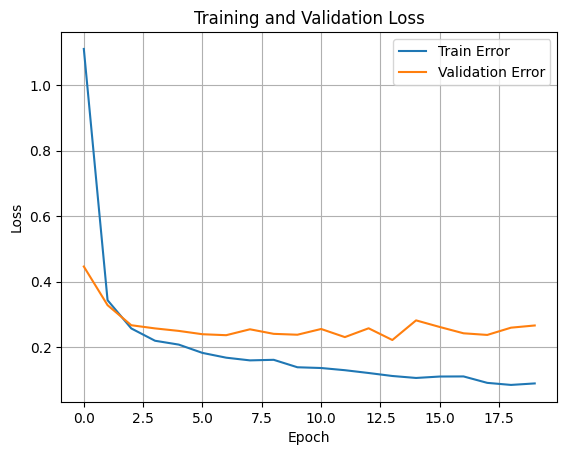

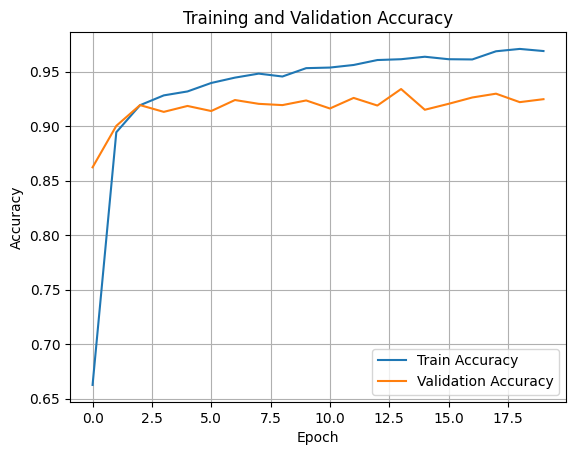

In [12]:
# Done all this above 

# Train the model with progress bars

# Define the optimizer
#optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.001)

#train_model(mlp_model, optimizer, epochs=10)

metrics_task = pd.read_csv("./logs_task_5/lightning_logs/version_0/metrics.csv")
metrics_task.set_index("epoch", inplace=True)
metrics_task = metrics_task.groupby(level=0).sum().drop("step", axis=1)
#print(metrics_task.keys())

# Plot using matplotlib to plot your results
plt.figure()
plt.plot(metrics_task.index, metrics_task['train_loss'], label='Train Error')
plt.plot(metrics_task.index, metrics_task['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(metrics_task.index, metrics_task['train_acc'], label='Train Accuracy')
plt.plot(metrics_task.index, metrics_task['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
    
### Task 5: Discussion Questions <a class="anchor" id="t5_5"></a>

### Questions
1. What is the approach you took to solve the problem?

2. Describe your chosen model and hyper-parameter tuning procedure.

3. Observations and plots from the evaluation on the test set and your own recordings. Have you managed to improve your model over time?
    
### Answers
    
1. First was choosing the proper the speech recognition model. After some research I found teh following:
- Word2Vec2 seemed to be a good choice. Focusses on laerning from raw audio and can be fine-tuned for various speech-related tasks. You also need a tokeniser to decode the output
- Whisper Focuses on transcription and translation, outputting text directly. Designed ot handle multiple langauges and accents, which is useful but probably not for sigle word commands. It's output would be a varible length, not a fixed vector length makinging it harder to input into a model
- Hubert is similar to Word2Vec2 but uses a different methodology. It was useful at predicting clusters which I thought would be good for single word comands (since each word could be a cluster?). The most computationally expensive option.

I chose to go with Hubert as I thought it had a lot of upsides and I was heading to work so I could let it run while I was there.
For the model, I used a basic feedforeward MLP as it seemed like the right choise for a classification problem. 

2. Model structure was:
- Input layer: 768 neurons (matching the output length of Hubert).
- Three hidden layers with 512, 256, and 128 neurons respectively, each followed by ReLU activation.
- Output layer: num_classes (10) neurons for classification.

I used the Cross-Entropy Loss as it was a multiclass classification problem and the Adam optimizer with a learning rate of 0.001.
- 4 layers were chosen as I thought speech would be a bit more complex and require additional layers to extract the features
- Initial experiments with the activation function showed little change so I just kept it at ReLu
- 0.001 falls within the standard learning rate range for Adam optimizer
- The model checkpoint at 10-15 epochs so I kept epochs low at 20.

3. After uploading the model achieved 94% Test Accuracy. This indicates the model performs well on unseen data, suggesting good generalization.
- Loss curves seem to drop realy early and as the we go through the epochs they are unstable. This suggests that the model finds the optimal values early in the training.




<div class="alert alert-block alert-info">

### Final Submission to Kaggle 
To evaluate the performance of your best model on the test set and generate predictions for submission to the Kaggle competition, you can use the `evaluate_model_and_save_prediction` function provided below. You can only submit one time per day for the Kaggle competition and we only take your final CSV submission

The function takes three arguments: the trained model (your best model), the dataloader for the test set, and the path to the CSV file containing the test filenames. 


After running this code, the function will evaluate the model on the test set, generate predictions, and save them to a CSV file. You can then submit the CSV file to the Kaggle competition for evaluation. 

Please note that the `evaluate_model_and_save_prediction` function assumes that the model has already been trained and is ready for evaluation. It also assumes that the test dataset has been preprocessed and is ready for evaluation. 

Good luck with your submission to the Kaggle competition!
```

### DO NOT change any code below, other than your name and ID

In [36]:
# Update your name, and ID here
First_name = "Campbell"
Surname = "Gregor"
Student_ID = 33110018
# I was having soime issues with making the csv file, I resolved it by copying the new_test out of its directory
# and renaming it to Campbell_Gregor_33110018.csv each time I predicted
# I didn't want to alter the below code 

In [32]:
# DO NOT CHANGE!
def evaluate_model_and_save_predictions(model, loader, device, csv_file):
    """
    Evaluates the model on the provided DataLoader, calculates accuracy using torchmetrics,
    and saves predictions to a CSV file.
    
    Args:
    - model: The trained model.
    - loader: DataLoader for the dataset (test).

    - device: Device (CPU or GPU) for evaluation.
    - csv_file: Path to the CSV file to save predictions.
    
    Returns:
    - Accuracy as a percentage.
    """
    
    model.eval()  # Set the model to evaluation mode
    
    predictions = []

    with torch.no_grad():
        for features, _ in loader:
            features = features.to(device)

            # Forward pass
            outputs = model(features)

            # Get predicted labels
            _, predicted_labels = torch.max(outputs, 1)
            predictions.extend(predicted_labels.cpu().numpy())

    # Save predictions to CSV
    df = pd.read_csv(csv_file)
    df['Label'] = predictions
    df.to_csv(csv_file, index=False)

    # Return accuracy as a percentage
    return predictions

In [33]:
# DO NOT CHANGE!

predictions = evaluate_model_and_save_predictions(mlp_model, test_loader, device, f"{First_name}_{Surname}_{str(Student_ID)}.csv")

<div class="alert alert-block alert-danger">
    
## Final remarks

Well done on making it all the way to the end. We hope you have enjoyed applying deep learning concepts to further your understanding and to new applications ! All the best :)